# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
df['Hemisfério'] = np.where(df['Latitude']>=0, 'Norte', 'Sul')

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

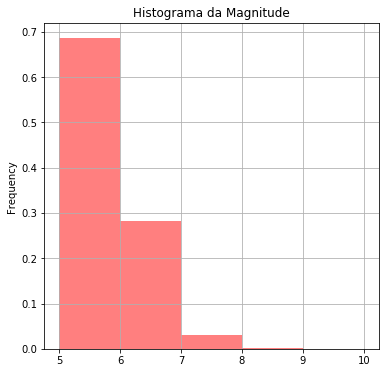

In [7]:
faixa=np.arange(5,11,1)

plot = df.Magnitude.plot.hist(bins=faixa,title='Histograma da Magnitude',figsize=(6, 6), normed=1, alpha=0.5, color='red')
plt.grid(True)

O Histograma da Magnitude nos mostra que aproximadamente 70% dos terremotos que acontecem tem magnitude entre 5 e 6 na Escala de Richter, ja entre 6 e 7 esse numero cai pela metade, apenas 30%, entre 7 e 8 esse numero é menor ainda chegando a aproximadamente 3%, acima de 8 ja chegamos a menos de 1%.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

5.49999999967 0.382548648851


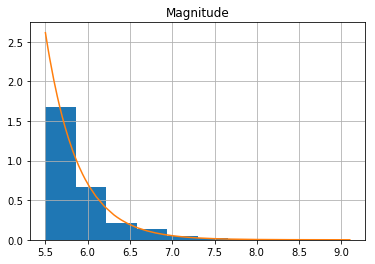

In [32]:
mu,sigma = expon.fit(df['Magnitude'])
print(mu,sigma)
df.hist(column = 'Magnitude', normed = True)
plt.plot(sorted(df['Magnitude']),expon.pdf(sorted(df['Magnitude']), loc = mu, scale = sigma))


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [43]:
tabela = pd.crosstab(df.Hemisfério,df.Type,normalize=True)*100
tabela

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,44.716385,0.008543,0.627883,0.000000
Sul,54.514779,0.008543,0.119597,0.004271


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [44]:
probNorte = 44.716385 + 0.008543 + 0.627883 + 0.000000
print(probNorte, "%")

45.352811 %


Explique o seu raciocínio

se em todos os dados a chance de acontecer um terremoto (seja la a causa) foi de 45% a chance de vir a acontecer outro sera de 45% tambem

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [51]:
probNuclear = 0.627883/(45.352811)
probNuclear

0.013844411981431536

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

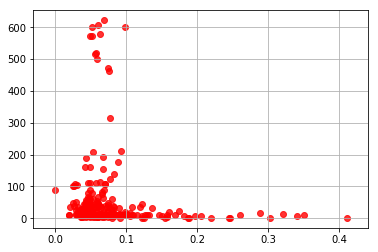

In [54]:
plt.scatter(df["Magnitude Error"], df.Depth , c='red', alpha=0.8)
plt.grid(True)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [61]:
DF=df.dropna(subset=['Magnitude Error','Depth'])
np.corrcoef(DF["Magnitude Error"],DF.Depth)[0,1]

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

O valor mais proximo de 0 significa que nao tem uma relacao linear, e ele sendo negativo significa que sua relacao é mais negativa do que positiva

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

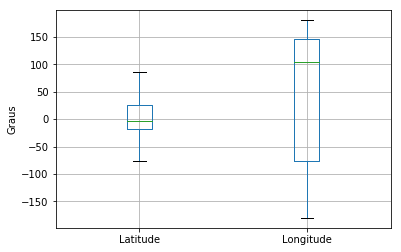

In [63]:
plot = df.boxplot(column=['Latitude','Longitude'], figsize=(8,8))
plt.ylabel("Graus")


A maior parte dos casos de terremoto aconteceram proximos a latitude de 0 graus tendendo ao equilibrio, porem acontecem em longitudes muito variadas tendendo a positivas

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [64]:
case = df[(df['Magnitude Type'] == 'MB') & (df['Type']== 'Nuclear Explosion')]

In [66]:
case['Hemisfério'].value_counts(True)

Norte    0.828221
Sul      0.171779
Name: Hemisfério, dtype: float64

Com 82% de chance é mais provavel que acontecam no norte